In [105]:
import os
import matplotlib.pyplot as plt

In [106]:
path = "./deep_sort/deep/curve/"
model_paths = []
for file in os.listdir(path):
    if "epoch50" in file:
        model_paths.append(file)

model_paths

['Market_epoch50_lr0.001_batch64_optadam',
 'Market_epoch50_lr0.001_batch64_optadamax',
 'Market_epoch50_lr0.001_batch64_optsgd',
 'VeRi_epoch50_lr0.001_batch64_optadam',
 'VeRi_epoch50_lr0.001_batch64_optadamax',
 'VeRi_epoch50_lr0.001_batch64_optsgd']

In [107]:
dictionary = {}
model_name = []
for model_path in model_paths:
    path_split = model_path.split("_")
    model_name.append(path_split[0] + "_" + path_split[-1])
    dictionary[path_split[0] + "_" + path_split[-1]] = {}

dictionary

{'Market_optadam': {},
 'Market_optadamax': {},
 'Market_optsgd': {},
 'VeRi_optadam': {},
 'VeRi_optadamax': {},
 'VeRi_optsgd': {}}

In [108]:
for i, model_path in enumerate(model_paths):
    for file in os.listdir(os.path.join(path, model_path)):
        if "time" in file:
            continue
        if file.endswith(".txt"):
            name = file.split(".")[0]
            # print(name)
            data = open(os.path.join(path, model_path, file), "r").read().splitlines()
            dictionary[model_name[i]][name] = data
            # print(data)
keys = list(dictionary[model_name[0]].keys())
dictionary

{'Market_optadam': {'test_err': ['9.746634996041171339e-01',
   '9.386381631037212792e-01',
   '8.974663499604117467e-01',
   '8.578780680918447477e-01',
   '7.957244655581947601e-01',
   '7.751385589865400494e-01',
   '6.686460807600950185e-01',
   '5.795724465558194094e-01',
   '6.088677751385589421e-01',
   '5.356294536817102214e-01',
   '4.825811559778305782e-01',
   '4.093428345209817465e-01',
   '4.188440221694378351e-01',
   '4.026128266033254244e-01',
   '3.349168646080760148e-01',
   '3.594615993665875031e-01',
   '3.182897862232778596e-01',
   '2.913697545526524602e-01',
   '2.426761678543151168e-01',
   '2.331749802058590282e-01',
   '2.379255740300870725e-01',
   '2.343626286619160393e-01',
   '1.805225653206651293e-01',
   '1.832937450514647848e-01',
   '1.971496437054631734e-01',
   '1.674584323040380074e-01',
   '1.389548693586698525e-01',
   '1.437054631828978968e-01',
   '1.516231195566112300e-01',
   '1.282660332541567527e-01',
   '1.365795724465558303e-01',
   '1.219

In [109]:
keys

['test_err', 'test_loss', 'train_err', 'train_loss']

In [110]:
for name, values in dictionary.items():
    for key2 in keys:
        print(name, values[key2])

Market_optadam ['9.746634996041171339e-01', '9.386381631037212792e-01', '8.974663499604117467e-01', '8.578780680918447477e-01', '7.957244655581947601e-01', '7.751385589865400494e-01', '6.686460807600950185e-01', '5.795724465558194094e-01', '6.088677751385589421e-01', '5.356294536817102214e-01', '4.825811559778305782e-01', '4.093428345209817465e-01', '4.188440221694378351e-01', '4.026128266033254244e-01', '3.349168646080760148e-01', '3.594615993665875031e-01', '3.182897862232778596e-01', '2.913697545526524602e-01', '2.426761678543151168e-01', '2.331749802058590282e-01', '2.379255740300870725e-01', '2.343626286619160393e-01', '1.805225653206651293e-01', '1.832937450514647848e-01', '1.971496437054631734e-01', '1.674584323040380074e-01', '1.389548693586698525e-01', '1.437054631828978968e-01', '1.516231195566112300e-01', '1.282660332541567527e-01', '1.365795724465558303e-01', '1.219319081551860640e-01', '1.088677751385589421e-01', '1.041171813143310088e-01', '1.025336500395882533e-01', '1.1

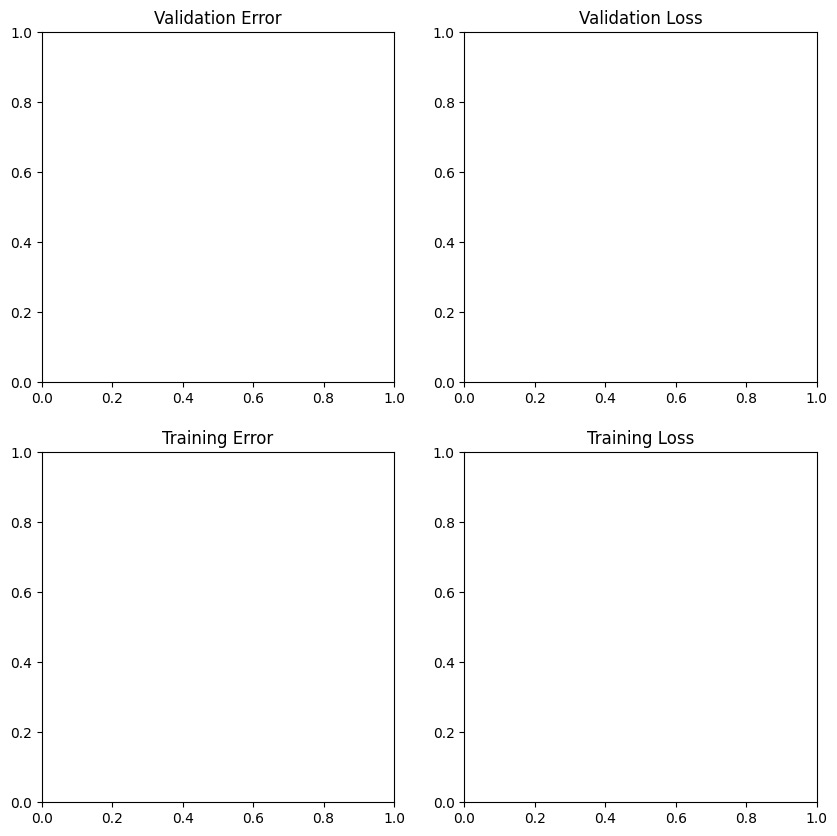

In [111]:
fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(221, title="Validation Error")
ax1 = fig.add_subplot(222, title="Validation Loss")
ax2 = fig.add_subplot(223, title="Training Error")
ax3 = fig.add_subplot(224, title="Training Loss")


In [112]:
epoch = [i for i in range(1, 51)]

In [113]:
for name, values in dictionary.items():
    ax0.plot(epoch, [float(i) for i in values["test_err"]], label=name)
    ax1.plot(epoch, [float(i) for i in values["test_loss"]], label=name)
    ax2.plot(epoch, [float(i) for i in values["train_err"]], label=name)
    ax3.plot(epoch, [float(i) for i in values["train_loss"]], label=name)
    
ax0.legend()
ax1.legend()
ax2.legend()
ax3.legend()

In [114]:
fig.savefig("deep_sort/deep/curve/curve.png")